In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = open("./20230531_CVD_3158_map/fits_out/IMAGES/det_1_0_0_to_2_9_9.csv", "r")

dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

for i in range(0, 201):
    s = file.readline().split(";")
    if i != 0: #don't try to process column headers
        index = int(s[0]) #file index is first in the line
        x = int(((index)/10) % 10)
        y = int((index) % 10)
        si_counts = float(s[2])
        ga_counts = float(s[8])
        if int(s[0]) < 100 : #separate into detector 1 and detector 2
            dat_si_d1[x][y] = si_counts
            dat_ga_d1[x][y] = ga_counts
        elif int(s[0]) >= 100:
            dat_si_d2[x][y] = si_counts
            dat_ga_d2[x][y] = ga_counts
        
file.close()

In [3]:
avg_si_d1 = sum(dat_si_d1.reshape(100))/100
std_si_d1 = np.sqrt(sum((dat_si_d1-avg_si_d1).reshape(100)**2)/100)

avg_si_d2 = sum(dat_si_d2.reshape(100))/100
std_si_d2 = np.sqrt(sum((dat_si_d2-avg_si_d2).reshape(100)**2)/100)

avg_ga_d1 = sum(dat_ga_d1.reshape(100))/100
std_ga_d1 = np.sqrt(sum((dat_ga_d1-avg_ga_d1).reshape(100)**2)/100)

avg_ga_d2 = sum(dat_ga_d2.reshape(100))/100
std_ga_d2 = np.sqrt(sum((dat_ga_d2-avg_ga_d2).reshape(100)**2)/100)

print("\tAvg\tSTD")
print("Si, d1:\t{0:.0f}\t{1:.2f}".format(avg_si_d1, std_si_d1))
print("Si, d2:\t{0:.0f}\t{1:.2f}".format(avg_si_d2, std_si_d2))
print("Ga, d1:\t{0:.0f}\t{1:.2f}".format(avg_ga_d1, std_ga_d1))
print("Ga, d2:\t{0:.0f}\t{1:.2f}".format(avg_ga_d2, std_ga_d2))

	Avg	STD
Si, d1:	361049	1268.25
Si, d2:	377080	1450.63
Ga, d1:	14174	145.57
Ga, d2:	14474	150.46


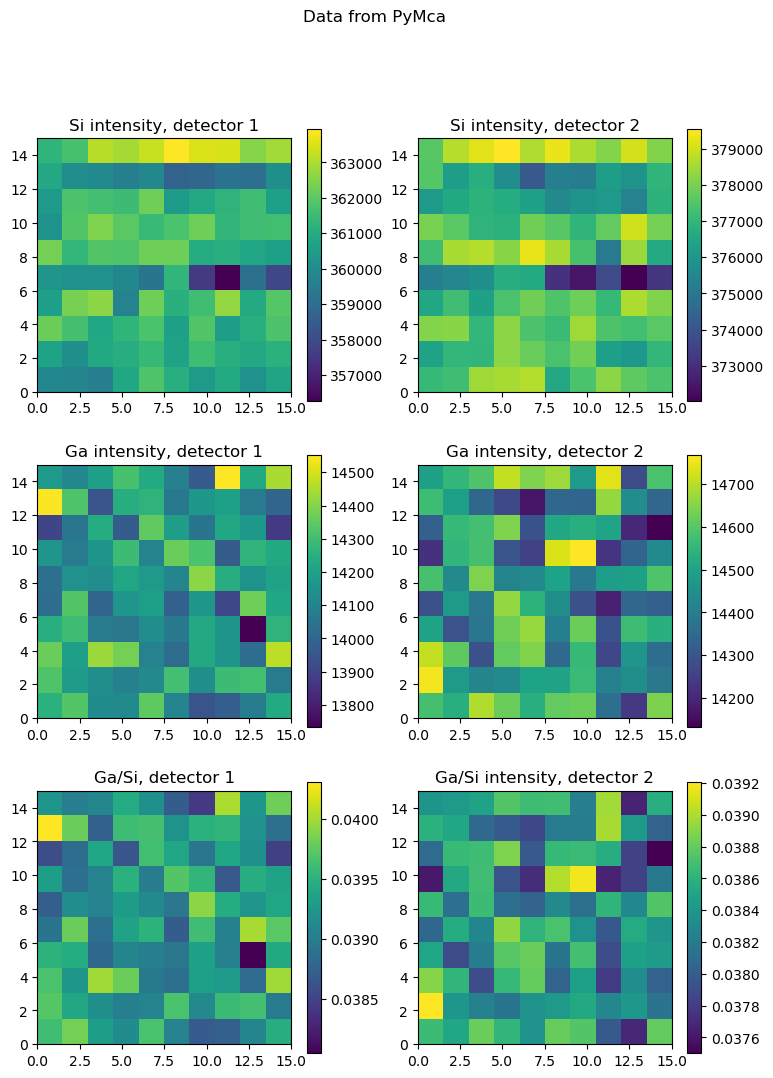

In [4]:
#si_max = max([dat_si_d1.max(), dat_si_d2.max()])
#si_min = min([dat_si_d1.min(), dat_si_d2.min()])

#ga_max = max([dat_ga_d1.max(), dat_ga_d2.max()])
#ga_min = min([dat_ga_d1.min(), dat_ga_d2.min()])

c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 12))

im1_pointer = ax1.imshow(dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im1_pointer, ax=ax1)
ax1.set_title("Si intensity, detector 1")

im3_pointer = ax3.imshow(dat_ga_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im3_pointer, ax=ax3)
ax3.set_title("Ga intensity, detector 1")

im5_pointer = ax5.imshow(dat_ga_d1/dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im5_pointer, ax=ax5)
ax5.set_title("Ga/Si, detector 1")

im2_pointer = ax2.imshow(dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im2_pointer, ax=ax2)
ax2.set_title("Si intensity, detector 2")

im4_pointer = ax4.imshow(dat_ga_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im4_pointer, ax=ax4)
ax4.set_title("Ga intensity, detector 2")

im6_pointer = ax6.imshow(dat_ga_d2/dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im6_pointer, ax=ax6)
ax6.set_title("Ga/Si intensity, detector 2")

fg.suptitle("Data from PyMca")

plt.show()